In [1]:
import statsmodels.api as sm
import numpy as np
import pandas as pd

In [2]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib notebook

In [3]:
df = pd.read_csv('C:/Users/Desktop/Desktop/Dissertation/snp500/stock_dfs/IBM.csv')

In [4]:
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2000-01-03,116.0000,111.875,112.4375,116.0000,10347700.0,80.076149
1,2000-01-04,114.5000,110.875,114.0000,112.0625,8227800.0,77.358032
2,2000-01-05,119.7500,112.125,112.9375,116.0000,12733200.0,80.076149
3,2000-01-06,118.9375,113.500,118.0000,114.0000,7971900.0,78.695503
4,2000-01-07,117.9375,110.625,117.2500,113.5000,11856700.0,78.350372


In [5]:
df.set_index('Date', inplace=True)

In [6]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,116.0000,111.875,112.4375,116.0000,10347700.0,80.076149
2000-01-04,114.5000,110.875,114.0000,112.0625,8227800.0,77.358032
2000-01-05,119.7500,112.125,112.9375,116.0000,12733200.0,80.076149
2000-01-06,118.9375,113.500,118.0000,114.0000,7971900.0,78.695503
2000-01-07,117.9375,110.625,117.2500,113.5000,11856700.0,78.350372


In [7]:
df.index

Index(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06', '2000-01-07',
       '2000-01-10', '2000-01-11', '2000-01-12', '2000-01-13', '2000-01-14',
       ...
       '2019-01-17', '2019-01-18', '2019-01-22', '2019-01-23', '2019-01-24',
       '2019-01-25', '2019-01-28', '2019-01-29', '2019-01-30', '2019-01-31'],
      dtype='object', name='Date', length=4800)

In [8]:
df_ac = df['Adj Close']
df_ac.head()

Date
2000-01-03    80.076149
2000-01-04    77.358032
2000-01-05    80.076149
2000-01-06    78.695503
2000-01-07    78.350372
Name: Adj Close, dtype: float64

In [10]:
df_ac.index

Index(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06', '2000-01-07',
       '2000-01-10', '2000-01-11', '2000-01-12', '2000-01-13', '2000-01-14',
       ...
       '2019-01-17', '2019-01-18', '2019-01-22', '2019-01-23', '2019-01-24',
       '2019-01-25', '2019-01-28', '2019-01-29', '2019-01-30', '2019-01-31'],
      dtype='object', name='Date', length=4800)

In [9]:
df_ac.describe().transpose()

count    4800.000000
mean      103.334458
std        38.508146
min        38.591488
25%        66.796144
50%        92.518040
75%       142.608089
max       175.264389
Name: Adj Close, dtype: float64

<IPython.core.display.Javascript object>


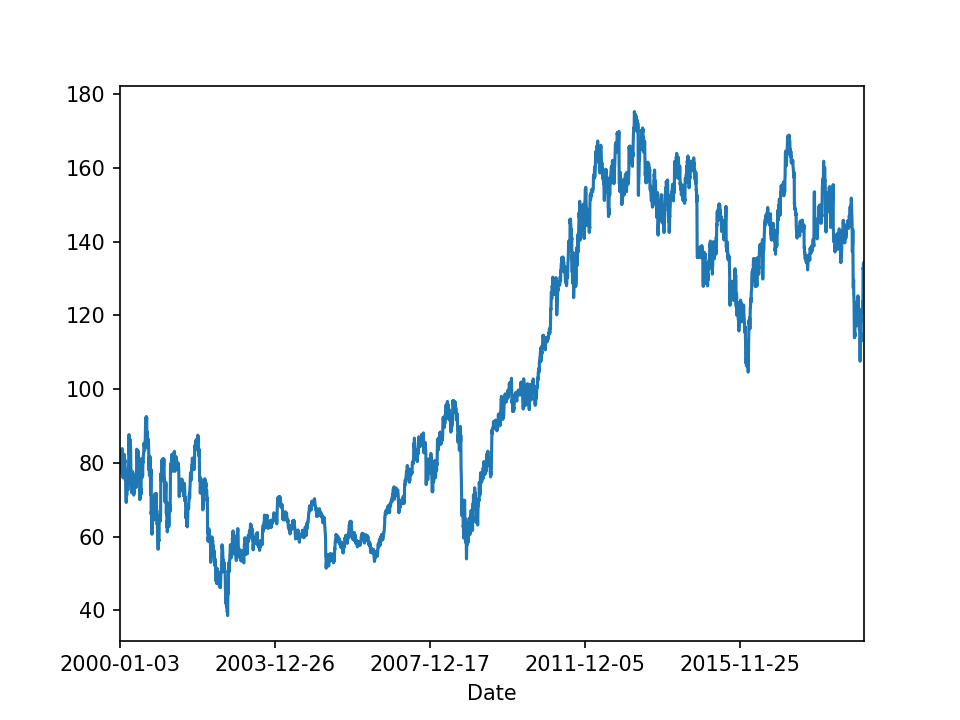

In [11]:
df_ac.plot()

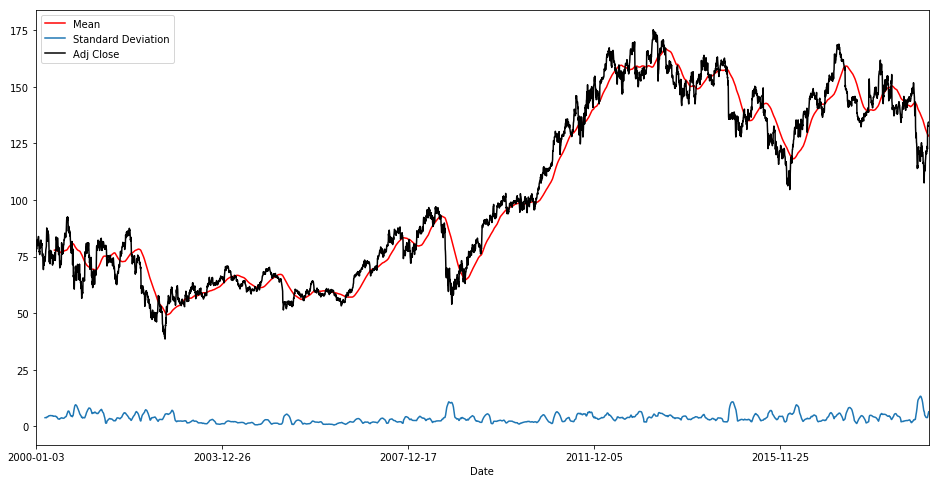

In [16]:
%matplotlib inline
plt.figure(figsize=(16,8))
df_ac.rolling(100).mean().plot(color = 'red', label='Mean')
df_ac.rolling(50).std().plot(label='Standard Deviation')
df_ac.plot(color = 'black')
plt.legend()

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [33]:
decomp = seasonal_decompose(df_ac, freq=2)

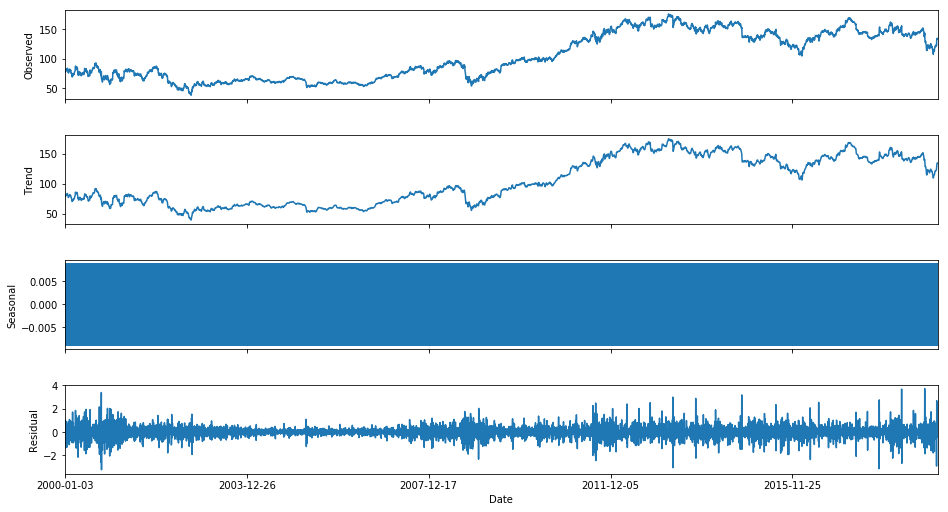

In [34]:
fig = decomp.plot()
fig.set_size_inches(15,8)

In [35]:
from statsmodels.tsa.stattools import adfuller

In [36]:
result = adfuller(df['Adj Close']
)
result

(-1.3159393856229977,
 0.6218488437390093,
 0,
 4799,
 {'1%': -3.431713367630984,
  '5%': -2.862142455512755,
  '10%': -2.567090688753965},
 17520.108289735814)

In [37]:
def adf_check(df_ac):
    result=adfuller(df_ac)
    print("Augmented dicky-fuller test")
    labels=['ADF Test Statistics', 'p-value','Num of lags', 'Num of Observation']
    
    for value, label in zip(result, labels):
        print(label+ " :" +str(value))
        
    if result[1] <= 0.05:
        print('Against null hypothesis')
        print('Rejects null hypothesis')
        print('Data has no unit root and is stationary')
    else:
        print('Weak evidence against null hypothesis')
        print('Fail to rejects null hypothesis')
        print('It is non-stationary')

In [38]:
adf_check(df['Adj Close'])

Augmented dicky-fuller test
ADF Test Statistics :-1.3159393856229977
p-value :0.6218488437390093
Num of lags :0
Num of Observation :4799
Weak evidence against null hypothesis
Fail to rejects null hypothesis
It is non-stationary


In [39]:
df['First Difference '] = df['Adj Close'] - df['Adj Close'].shift(1)

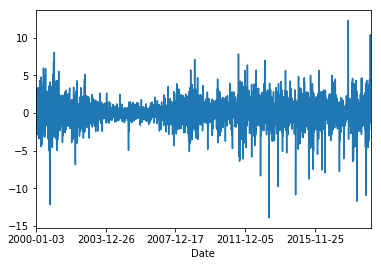

In [41]:
df['First Difference '].plot()

In [43]:
adf_check(df['First Difference '].dropna())

Augmented dicky-fuller test
ADF Test Statistics :-70.23647291124672
p-value :0.0
Num of lags :0
Num of Observation :4798
Against null hypothesis
Rejects null hypothesis
Data has no unit root and is stationary


In [45]:
df['Second Difference ']=df['First Difference '] =df['First Difference '].shift(1)

In [46]:
adf_check(df['Second Difference '].dropna())

Augmented dicky-fuller test
ADF Test Statistics :-70.22915490145694
p-value :0.0
Num of lags :0
Num of Observation :4797
Against null hypothesis
Rejects null hypothesis
Data has no unit root and is stationary


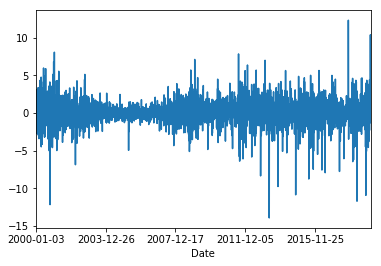

In [47]:
df['Second Difference '].plot()

In [48]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

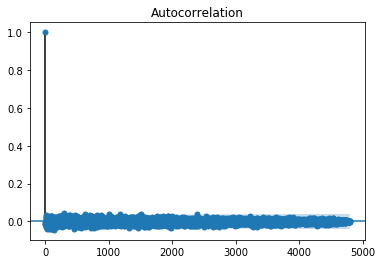

In [50]:
fig_first =plot_acf(df['First Difference '].dropna())

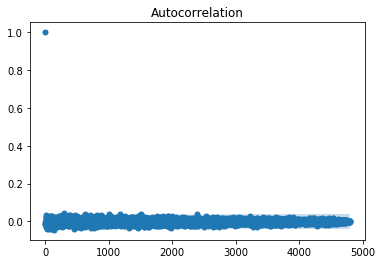

In [54]:
fig_second = plot_acf(df['Second Difference '].dropna(), use_vlines=False)

In [52]:
from pandas.plotting import autocorrelation_plot

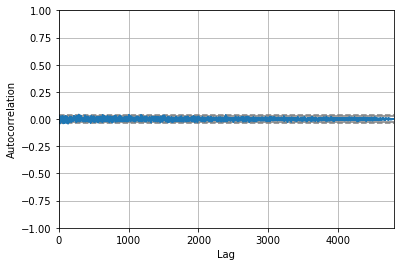

In [53]:
autocorrelation_plot(df['Second Difference '].dropna())